# ...........IMAGE PROCESSING USING RANDOM FOREST AND CNN...............

In [11]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix
import random
from sklearn import svm
import cv2

In [2]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

5


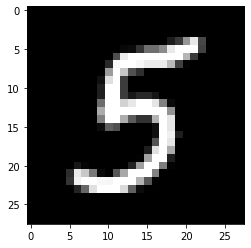

In [3]:
plt.imshow(X_train[11936],cmap='gray')
print(Y_train[11936])

In [4]:
# Flattening the images
num_pixels=X_train.shape[1]*X_train.shape[2]
print(num_pixels)
X_Train=X_train.reshape(X_train.shape[0],num_pixels)
X_Test=X_test.reshape(X_test.shape[0],num_pixels)

784


In [5]:
# Binarization of the vectors using thresholding
for i in range(X_Train.shape[0]):
    X_Train[i]=np.array(X_Train[i]>100,dtype='int32')
    if i<X_Test.shape[0]:
        X_Test[i]=np.array(X_Test[i]>100,dtype='int32')       

5


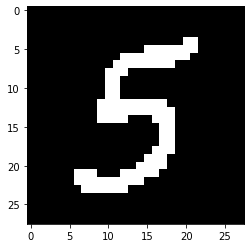

In [40]:
plt.imshow(X_Train[11936].reshape(28,28),cmap='gray')
print(Y_train[11936])

 ### CLASSIFICATION USING RANDOM FOREST

In [6]:
#model training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20,n_estimators=20)

In [7]:
clf.fit(X_Train,Y_train)

RandomForestClassifier(max_depth=20, n_estimators=20)

In [8]:
#model score prediction
score=clf.score(X_Test,Y_test)
score

0.9615

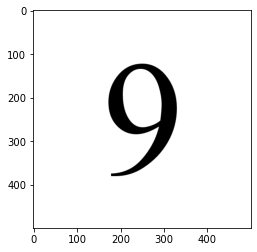

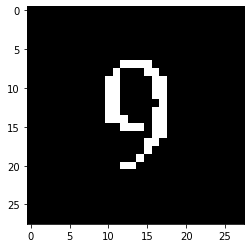

In [9]:
#model testing
plt.gray()
img1=cv2.imread('C:/Users/KIIT/Desktop/9.png',0)
imgplot=plt.imshow(img1)
plt.show()
test_img = cv2.resize(img1,(28,28),interpolation=cv2.INTER_AREA)
_,test_img = cv2.threshold(test_img, 127, 255, cv2.THRESH_BINARY_INV) 
#test_img = img1.reshape(8,8)
imgplot=plt.imshow(test_img)
plt.show()

In [12]:
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_Test,Y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_Test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(Y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(Y_test,y_pred)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...


In [13]:
print('\nRFC Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


RFC Trained Classifier Confidence:  0.9615

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Image Data:  0.9615

Confusion Matrix: 
 [[ 968    0    1    1    0    2    4    1    2    1]
 [   0 1122    1    6    0    2    3    1    0    0]
 [   9    0  991    6    4    2    3    7    7    3]
 [   0    0    7  974    1   11    0    7    8    2]
 [   2    3    2    0  936    1    8    1    2   27]
 [   3    3    3   17    2  849    3    1    8    3]
 [   6    3    3    0    4    3  936    0    3    0]
 [   0    5   22    3    1    0    0  980    2   15]
 [   7    1    4   13   10   11    3    4  910   11]
 [   6    4    4    9   12   11    2    8    4  949]]


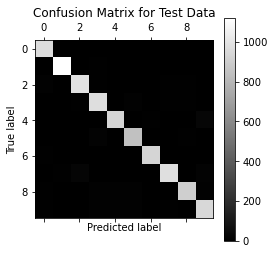

In [14]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

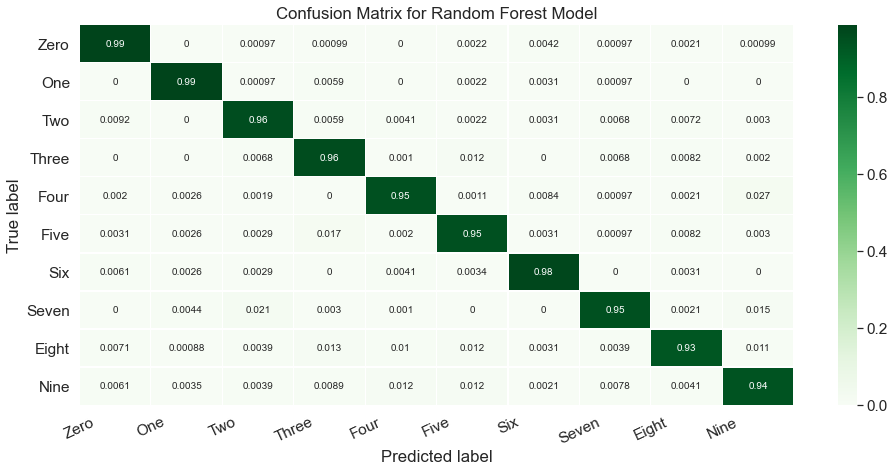

In [15]:
import seaborn as sns
matrix=confusion_matrix(Y_test,y_pred)
matrix=matrix.astype('float') / matrix.sum(axis=1)
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
class_names = ['Zero', 'One', 'Two', 
               'Three', 'Four', 'Five',    
               'Six','Seven','Eight','Nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [16]:
t=test_img.reshape(1,-1)
pred=clf.predict(t)
print("prediction: ",pred)

prediction:  [9]


### CLASSIFICATION USING CNN

In [47]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [48]:
# data preprocessing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [49]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [50]:
#data normalization
X_train /= 255
X_test /= 255

In [52]:
#model training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5585 - accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2259 - accuracy: 0.9327
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1656 - accuracy: 0.9499
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1382 - accuracy: 0.9580
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1181 - accuracy: 0.9640
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1039 - accuracy: 0.9679
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0949 - accuracy: 0.9709
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0856 - accuracy: 0.9735
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0809 - accuracy: 0.9747
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [56]:
#model score prediction
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9782


[0.07268206775188446, 0.9782000184059143]

9


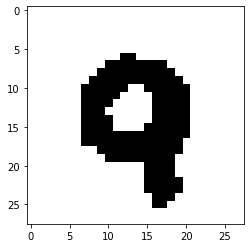

In [59]:
#model testing
import matplotlib.pyplot as plt
image_index = 1853
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
predict = X_test[image_index].reshape(28,28)
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())